# Part 1

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Q1_data.csv')

In [4]:
df

,Unnamed: 0,symbol,name,time_stamp,time_high,time_low,open,close,high,low,market_cap,volume
0,0,BTC,Bitcoin,2023-05-17T23:59:59.999Z,2023-05-17T20:09:00.000Z,2023-05-17T14:03:00.000Z,27035.470130,27398.802028,27465.927904,26600.144844,5.308901e+11,1.514001e+10
1,1,BTC,Bitcoin,2023-05-13T23:59:59.999Z,2023-05-13T18:50:00.000Z,2023-05-13T00:32:00.000Z,26807.769044,26784.078561,27030.482960,26710.873803,5.188737e+11,9.999172e+09
2,2,BTC,Bitcoin,2023-03-08T23:59:59.999Z,2023-03-08T00:23:00.000Z,2023-03-08T23:43:00.000Z,22216.442321,21718.079830,22268.896252,21708.050506,4.194214e+11,2.253658e+10
3,3,BTC,Bitcoin,2023-02-21T23:59:59.999Z,2023-02-21T08:30:00.000Z,2023-02-21T22:06:00.000Z,24833.048914,24436.354485,25126.851686,24200.364116,4.715777e+11,3.125210e+10
4,4,BTC,Bitcoin,2022-10-15T23:59:59.999Z,2022-10-15T03:59:00.000Z,2022-10-15T23:04:00.000Z,19185.437304,19067.635082,19212.541608,19019.250125,3.657224e+11,1.619224e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1451,BTC,Bitcoin,2022-11-07T23:59:59.999Z,2022-11-07T02:18:00.000Z,2022-11-07T22:33:00.000Z,20924.620484,20602.816725,21053.246150,20489.973344,3.955964e+11,5.351085e+10
1452,1452,BNB,BNB,2022-12-24T23:59:59.999Z,2022-12-24T00:02:00.000Z,2022-12-24T12:32:00.000Z,246.151646,244.635529,246.181715,243.953043,3.913335e+10,2.806274e+08
1453,1453,ETH,Ethereum,2023-04-18T23:59:59.999Z,2023-04-18T11:51:00.000Z,2023-04-18T01:16:00.000Z,2075.855262,2104.537267,2121.531519,2057.653862,2.512149e+11,9.134015e+09
1454,1454,ETH,Ethereum,2022-10-18T23:59:59.999Z,2022-10-18T00:35:00.000Z,2022-10-18T19:17:00.000Z,1331.669921,1310.447037,1339.085967,1291.660699,1.603645e+11,1.041675e+10


In [5]:
df['name'].unique()

array(['Bitcoin', 'BNB', 'Ethereum', 'Tether USDt'], dtype=object)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['volume','market_cap']] = scaler.fit_transform(df[['volume','market_cap']])

Text(0, 0.5, 'Market Cap')

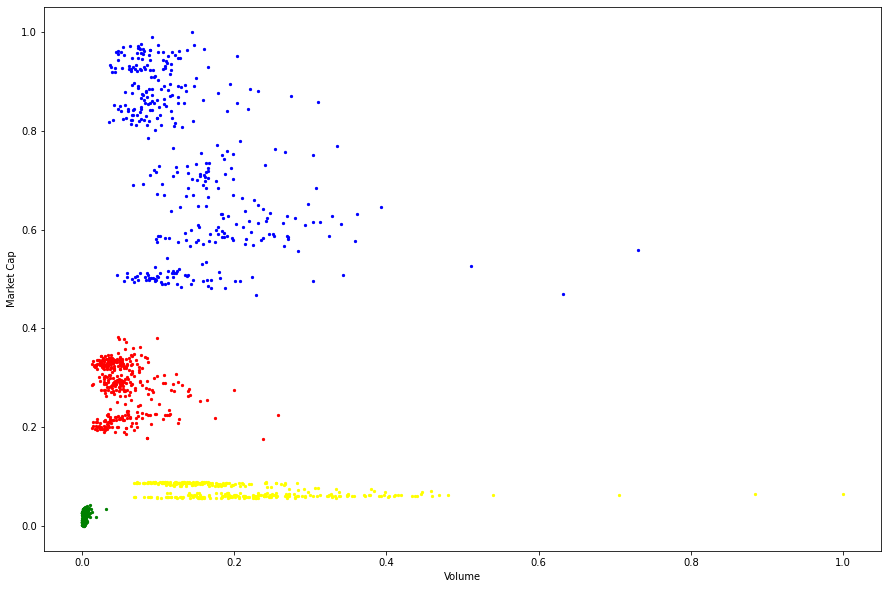

In [7]:
plt.figure(figsize=(15, 10))
plt.scatter(df[df['name'] == 'Bitcoin']['volume'], df[df['name'] == 'Bitcoin']['market_cap'], s=5, color='blue')
plt.scatter(df[df['name'] == 'BNB']['volume'], df[df['name'] == 'BNB']['market_cap'], s=5, color='green')
plt.scatter(df[df['name'] == 'Ethereum']['volume'], df[df['name'] == 'Ethereum']['market_cap'], s=5, color='red')
plt.scatter(df[df['name'] == 'Tether USDt']['volume'], df[df['name'] == 'Tether USDt']['market_cap'], s=5, color='yellow')
plt.xlabel('Volume')
plt.ylabel('Market Cap')

In [8]:
#run kmeans clustering based on market cap and volume 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['market_cap', 'volume']])
df['cluster'] = kmeans.predict(df[['market_cap', 'volume']])

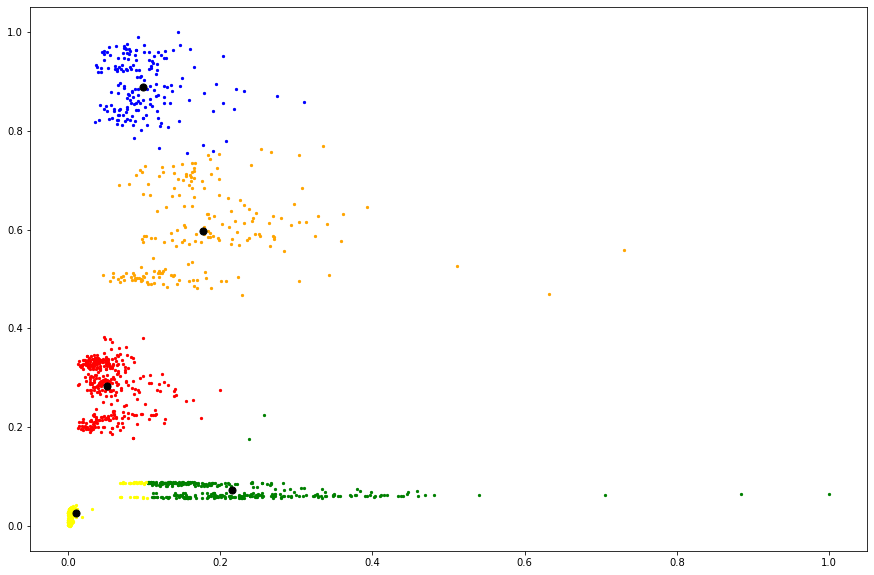

In [9]:
#plot the clusters
plt.figure(figsize=(15, 10))
plt.scatter(df[df['cluster'] == 0]['volume'], df[df['cluster'] == 0]['market_cap'], s=5, color='blue')
plt.scatter(df[df['cluster'] == 1]['volume'], df[df['cluster'] == 1]['market_cap'], s=5, color='green')
plt.scatter(df[df['cluster'] == 2]['volume'], df[df['cluster'] == 2]['market_cap'], s=5, color='red')
plt.scatter(df[df['cluster'] == 3]['volume'], df[df['cluster'] == 3]['market_cap'], s=5, color='yellow')
plt.scatter(df[df['cluster'] == 4]['volume'], df[df['cluster'] == 4]['market_cap'], s=5, color='orange')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], color='black', marker='o', s=50)
plt.show()

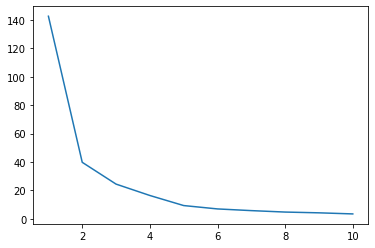

In [10]:
#run this for k =1 to k = 10 and calculate within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['market_cap', 'volume']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

In [11]:
#run dbscan clustering based on market cap and volume
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.055, min_samples=70, metric='euclidean')
dbscan.fit(df[['market_cap', 'volume']])
df['cluster'] = dbscan.labels_
df['cluster'].unique()

array([ 0, -1,  1,  2,  3], dtype=int64)

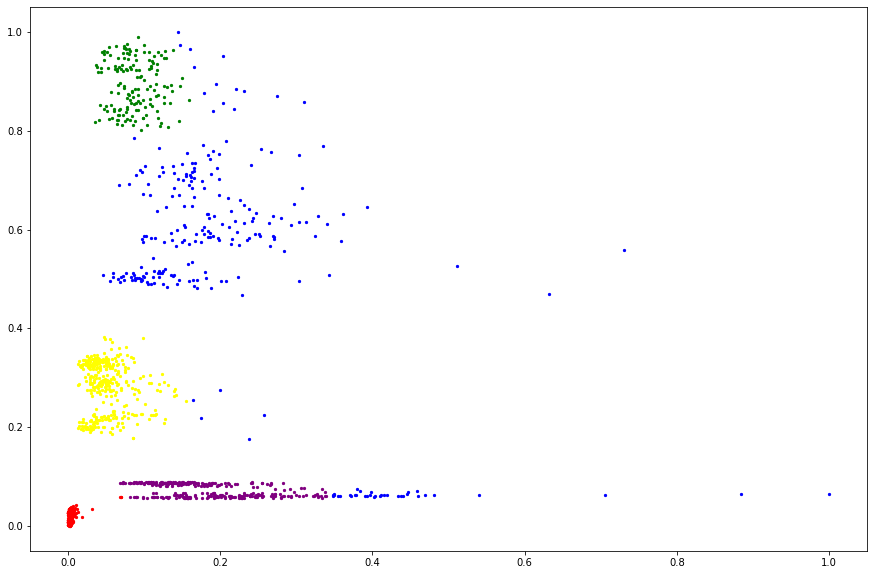

In [12]:
#plot the clusters
plt.figure(figsize=(15, 10))
plt.scatter(df[df['cluster'] == -1]['volume'], df[df['cluster'] == -1]['market_cap'], s=5, color='blue')
plt.scatter(df[df['cluster'] == 0]['volume'], df[df['cluster'] == 0]['market_cap'], s=5, color='green')
plt.scatter(df[df['cluster'] == 1]['volume'], df[df['cluster'] == 1]['market_cap'], s=5, color='red')
plt.scatter(df[df['cluster'] == 2]['volume'], df[df['cluster'] == 2]['market_cap'], s=5, color='yellow')
plt.scatter(df[df['cluster'] == 3]['volume'], df[df['cluster'] == 3]['market_cap'], s=5, color='purple')
# plt.scatter(df[df['cluster'] == 5]['volume'], df[df['cluster'] == 5]['market_cap'], s=5, color='pink')


# Part 2

In [13]:
df2 = pd.read_csv('coins_data.xlsx - Sheet1.csv')

In [14]:
df2

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum
5,SHIB,2.479944e+08,5606251419,"589,589,040,239,380",PoS,Ethereum
6,LTC,5.913019e+08,5729295460,"84,000,000",PoW,Litecoin
7,TRX,2.719028e+08,6018922345,"88,996,805,683",PoS,Tron
8,DOT,2.035592e+08,6659549868,"1,364,182,225",PoW,Polkadot
9,MATIC,4.232990e+08,8053184610,"10,000,000,000",PoS,Polygon


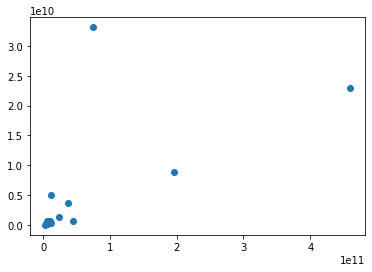

In [15]:
plt.scatter(df2['MarketCap'], df2['Volume'])

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2[['Volume','MarketCap']] = scaler.fit_transform(df2[['Volume','MarketCap']])

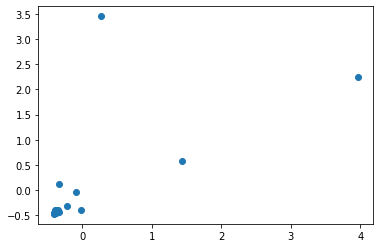

In [17]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# pairwise distances between data points
distances = pdist(df2[['MarketCap', 'Volume']], metric='euclidean')
square_distances = squareform(distances)
plt.scatter(df2['MarketCap'], df2['Volume'])

In [18]:
condensed_distances = squareform(square_distances)
linkage_matrix = linkage(condensed_distances, method='average')

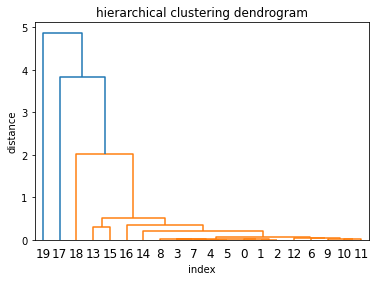

In [19]:
dendrogram(linkage_matrix, labels=df2.index)
plt.xlabel('index')
plt.ylabel('distance')
plt.title('hierarchical clustering dendrogram')
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]


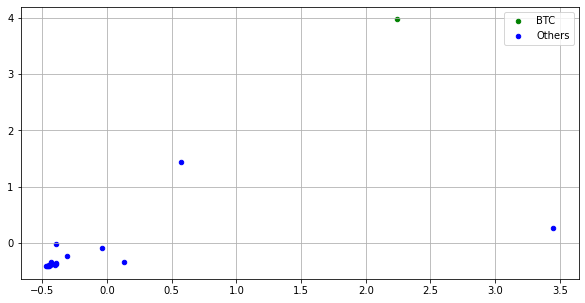

In [20]:
cluster_assignments = fcluster(linkage_matrix, t=4, criterion='distance')
print(cluster_assignments)
df2['Cluster'] = cluster_assignments
#plot the clusters
plt.figure(figsize=(10, 5))
plt.scatter(df2[df2['Cluster'] == 2]['Volume'], df2[df2['Cluster'] == 2]['MarketCap'], s=20, color='green' , label=df2.iloc[-1]['Symbol'])
plt.scatter(df2[df2['Cluster'] == 1]['Volume'], df2[df2['Cluster'] == 1]['MarketCap'], s=20, color='blue' , label='Others')
plt.grid(True)
plt.legend()
df2.drop('Cluster' , axis=1, inplace=True)

In [21]:
df2.columns

Index(['Symbol', 'Volume', 'MarketCap', 'TotalSupply', 'ProofType', 'Network'], dtype='object')

In [22]:
# #make a 3d plot for volume, market cap and prooftype
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(15, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df2['Volume'], df2['MarketCap'], df2['ProofType'], s=5)
# ax.set_xlabel('Volume')
# ax.set_ylabel('Market Cap')
# ax.set_zlabel('ProofType')
# plt.show()


In [23]:
# now cluster based on volume, market cap and proof type using dendogram
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['ProofType'] = encoder.fit_transform(df2['ProofType'])

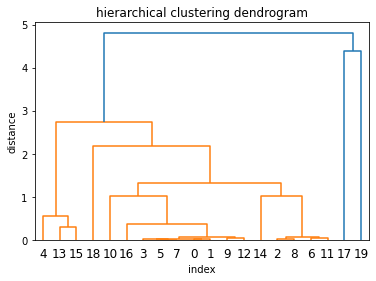

In [24]:
# now do the clustering
distances = pdist(df2[['MarketCap', 'Volume', 'ProofType']], metric='euclidean')
square_distances = squareform(distances)
# plt.scatter(df2['MarketCap'], df2['Volume'])
condensed_distances = squareform(square_distances)
linkage_matrix = linkage(condensed_distances, method='average')
dendrogram(linkage_matrix, labels=df2.index)
plt.xlabel('index')
plt.ylabel('distance')
plt.title('hierarchical clustering dendrogram')
plt.show()

# Part 3

In [63]:
import yfinance as yf
xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers = "XMR-USD",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [64]:
df_xmr.drop('Adj Close' , axis=1 , inplace=True)

In [65]:
df_xmr

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,116200000
...,...,...,...,...,...
2023-10-11,152.220093,153.929443,150.970428,153.842102,61162383
2023-10-12,153.852783,154.344238,151.021347,152.341812,65445853
2023-10-13,152.339523,154.368774,151.051971,153.590515,51282283


In [66]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_xmr[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df_xmr[['Open','High','Low','Close','Volume']])

In [67]:
df_xmr['Label'] = (df_xmr['Close'] > df_xmr['Close'].shift(1)).astype(int)

In [68]:
df_xmr[['Close','Volume','Label']]

,Close,Volume,Label
Date,,,
2017-11-09,120.779999,86864600,0
2017-11-10,105.585999,84614000,0
2017-11-11,119.615997,107708000,1
2017-11-12,123.856003,144948000,1
2017-11-13,123.402000,116200000,0
...,...,...,...
2023-10-11,153.842102,61162383,1
2023-10-12,152.341812,65445853,0
2023-10-13,153.590515,51282283,1


In [69]:
df_xmr

,Open,High,Low,Close,Volume,Label
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,86864600,0
2017-11-10,121.344002,121.665001,101.757004,105.585999,84614000,0
2017-11-11,105.750000,127.106003,103.877998,119.615997,107708000,1
2017-11-12,119.597000,133.675003,110.617996,123.856003,144948000,1
2017-11-13,128.960007,136.528000,120.921997,123.402000,116200000,0
...,...,...,...,...,...,...
2023-10-11,152.220093,153.929443,150.970428,153.842102,61162383,1
2023-10-12,153.852783,154.344238,151.021347,152.341812,65445853,0
2023-10-13,152.339523,154.368774,151.051971,153.590515,51282283,1


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report , f1_score 


In [83]:
X = df_xmr.drop('Label' , axis=1)  # Features
y = df_xmr['Label']  # Target variable


In [84]:
df_xmr['Label'].value_counts()

1    1135
0    1032
Name: Label, dtype: int64

In [85]:
train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [86]:
X_train

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,116200000
...,...,...,...,...,...
2022-08-03,156.732437,163.797897,155.176514,156.669693,110358575
2022-08-04,156.678818,162.766830,156.370255,159.335571,105835155
2022-08-05,159.320786,162.173553,156.934479,161.642426,91510566


In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))


0.712166172106825


In [90]:
# make nn model for this
# add recall to the metric 
# add precision to the metric
import tensorflow as tf
recall = tf.keras.metrics.Recall()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
model = Sequential([
    Dense(64, input_shape=(5,), activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[recall])
model.fit(X_train, y_train, epochs=3 , validation_data=(X_test, y_test))

Epoch 1/3
55/55 [==============================] - 2s 7ms/step - loss: 6692753.5000 - recall_14: 0.5587 - val_loss: 162297.1406 - val_recall_14: 0.0000e+00
Epoch 2/3
55/55 [==============================] - 0s 4ms/step - loss: 3378598.2500 - recall_14: 0.5989 - val_loss: 784485.8750 - val_recall_14: 1.0000
Epoch 3/3
55/55 [==============================] - 0s 3ms/step - loss: 2676764.2500 - recall_14: 0.5877 - val_loss: 61596.3516 - val_recall_14: 0.0000e+00


In [91]:
y_pred_nn = model.predict(X_test)
y_pred_nn = np.round(y_pred_nn)
print(f1_score(y_test, y_pred_nn))

14/14 [==============================] - 0s 2ms/step
0.0
